In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import diff, symbols, sin, cos, tan
from scipy.optimize import minimize
%matplotlib inline
from scipy.misc import derivative
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse


** Задание 1 **

In [3]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

** Часть a) **

*** Вариант 1 - простой перебор ***

In [80]:
RES = []
pair = []
for user in raitings:
    res_ = []
    for user1 in raitings:
        res = round(np.dot(user, user1)/(np.linalg.norm(user) * np.linalg.norm(user1)),5)
        if res == 1:
            res_.append(0)
        else:
            res_.append(res)
    RES.append([list(user), list(raitings[res_.index(max(res_))])])
RES

[[[4, 4, 9, 4, 1, 6, 10, 7, 9, 6, 9, 2, 8, 6, 6],
  [2, 7, 7, 6, 10, 6, 8, 9, 8, 6, 10, 1, 7, 10, 4]],
 [[9, 2, 5, 10, 7, 8, 10, 5, 6, 2, 1, 6, 8, 9, 7],
  [3, 7, 3, 5, 7, 9, 9, 6, 2, 9, 1, 2, 8, 10, 6]],
 [[1, 6, 8, 8, 4, 9, 3, 8, 10, 5, 2, 6, 8, 1, 6],
  [5, 10, 8, 8, 9, 7, 2, 9, 9, 10, 8, 8, 8, 6, 10]],
 [[6, 1, 9, 7, 7, 9, 2, 3, 5, 1, 6, 6, 3, 2, 7],
  [5, 10, 8, 8, 9, 7, 2, 9, 9, 10, 8, 8, 8, 6, 10]],
 [[3, 7, 3, 5, 7, 9, 9, 6, 2, 9, 1, 2, 8, 10, 6],
  [2, 7, 7, 6, 10, 6, 8, 9, 8, 6, 10, 1, 7, 10, 4]],
 [[8, 3, 7, 3, 8, 6, 1, 8, 8, 6, 1, 9, 4, 10, 1],
  [5, 10, 8, 8, 9, 7, 2, 9, 9, 10, 8, 8, 8, 6, 10]],
 [[9, 8, 4, 8, 8, 10, 6, 1, 1, 2, 9, 5, 2, 7, 2],
  [6, 1, 9, 7, 7, 9, 2, 3, 5, 1, 6, 6, 3, 2, 7]],
 [[4, 1, 6, 4, 3, 10, 4, 4, 2, 8, 7, 9, 3, 8, 3],
  [8, 3, 7, 3, 8, 6, 1, 8, 8, 6, 1, 9, 4, 10, 1]],
 [[2, 7, 7, 6, 10, 6, 8, 9, 8, 6, 10, 1, 7, 10, 4],
  [4, 4, 9, 4, 1, 6, 10, 7, 9, 6, 9, 2, 8, 6, 6]],
 [[5, 10, 8, 8, 9, 7, 2, 9, 9, 10, 8, 8, 8, 6, 10],
  [1, 6, 8, 8, 4, 9, 3, 8, 1

*** Вариант 2 - использование cosine_similarity ***

In [4]:
RESULT = []
similarities = cosine_similarity(raitings)
res = similarities - np.eye(10)
res2 = np.apply_along_axis(np.argmax, 1, res)
for i, k in zip(raitings, res2):
    RESULT.append([list(i), list(raitings[k])])
RESULT

[[[4, 4, 9, 4, 1, 6, 10, 7, 9, 6, 9, 2, 8, 6, 6],
  [2, 7, 7, 6, 10, 6, 8, 9, 8, 6, 10, 1, 7, 10, 4]],
 [[9, 2, 5, 10, 7, 8, 10, 5, 6, 2, 1, 6, 8, 9, 7],
  [3, 7, 3, 5, 7, 9, 9, 6, 2, 9, 1, 2, 8, 10, 6]],
 [[1, 6, 8, 8, 4, 9, 3, 8, 10, 5, 2, 6, 8, 1, 6],
  [5, 10, 8, 8, 9, 7, 2, 9, 9, 10, 8, 8, 8, 6, 10]],
 [[6, 1, 9, 7, 7, 9, 2, 3, 5, 1, 6, 6, 3, 2, 7],
  [5, 10, 8, 8, 9, 7, 2, 9, 9, 10, 8, 8, 8, 6, 10]],
 [[3, 7, 3, 5, 7, 9, 9, 6, 2, 9, 1, 2, 8, 10, 6],
  [2, 7, 7, 6, 10, 6, 8, 9, 8, 6, 10, 1, 7, 10, 4]],
 [[8, 3, 7, 3, 8, 6, 1, 8, 8, 6, 1, 9, 4, 10, 1],
  [5, 10, 8, 8, 9, 7, 2, 9, 9, 10, 8, 8, 8, 6, 10]],
 [[9, 8, 4, 8, 8, 10, 6, 1, 1, 2, 9, 5, 2, 7, 2],
  [6, 1, 9, 7, 7, 9, 2, 3, 5, 1, 6, 6, 3, 2, 7]],
 [[4, 1, 6, 4, 3, 10, 4, 4, 2, 8, 7, 9, 3, 8, 3],
  [8, 3, 7, 3, 8, 6, 1, 8, 8, 6, 1, 9, 4, 10, 1]],
 [[2, 7, 7, 6, 10, 6, 8, 9, 8, 6, 10, 1, 7, 10, 4],
  [4, 4, 9, 4, 1, 6, 10, 7, 9, 6, 9, 2, 8, 6, 6]],
 [[5, 10, 8, 8, 9, 7, 2, 9, 9, 10, 8, 8, 8, 6, 10],
  [1, 6, 8, 8, 4, 9, 3, 8, 1

** Часть b) **

*** Для решения задачи применим fit_transform() к матрице raitings.
После попробуем восстановить данные с помощью inverse_transform() и посчитаем различие с помощью MSE

In [85]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [95]:
pca = PCA(n_components = 5)
raiting_reduced = pca.fit_transform(raitings)
raiting_recovered = pca.inverse_transform(raiting_reduced)
mse_res = mean_squared_error(raitings, raiting_recovered)
#print(raitings)
#print(raiting_recovered)
#print(raiting_reduced)
print(mse_res)


1.245544269672819


** Задание 2 **

In [17]:
def f(x):
    return (np.tan(np.sin(x) + np.cos(2*x + 3)))**2

In [23]:
#расчет производной на питоне
x = symbols('x')
diff((tan(sin(x) + cos(2*x + 3)))**2)

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [26]:
#получение значения 1-й производной в точке x=1
f_1 = derivative(f, 1.0, dx=1e-6)
print(f_1)

55.3859176464222


In [ ]:
#расчет производной руками

f'(x) = ((tan(sin(x) + cos(2x+3)))^2)’ = 2tan(sin(x) + cos(2x+3)) * (tan(sin(x) + cos(2x+3)))’

(tan(sin(x) + cos(2x+3)))’ = (sin(x) + cos(2x+3))’ / (cos(sin(x) + cos(2x+3))^2 = 
= (cos(x) – 2 sin(2x+3)) / ((cos(sin(x) + cos(2x+3))^2) = 
= (cos(x) – 2 sin(2x+3)) (tan(sin(𝑥)+cos(2𝑥+3))+1)^2

f'(x) = ((tan(sin(x) + cos(2x+3)))^2)’ = 2tan(sin(x) + cos(2x+3)) *(cos(x) – 2 sin(2x+3)) * (tan(sin(𝑥)+cos(2𝑥+3))+1)^2
f'(x=1) = 2tan(sin(1) + cos(5)) *(cos(1) – 2 sin(5)) * (tan(sin(1)+cos(5))+1)^2

** Задание 3 **

In [125]:
import matplotlib.pyplot as plt

In [3]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [4]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

In [8]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [9]:
res = minimize(error,  (-1,0),  method='COBYLA')

In [30]:
A = res.x[0]
B = res.x[1]
print('a = ', round(A, 1),'; b = ', round(B,1))

a =  3.0 ; b =  -2.5


In [36]:
error_ = []
for i in range(len(x)):
    error_.append(abs(fx[i] - f(x[i], A, B)))
print(np.mean(error_))
    

0.004152856241305125


In [45]:
def g(x):
    return np.e**3 * np.sin(-2.5*x) + x

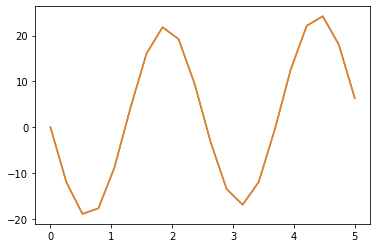

In [46]:
plt.plot(x, fx)
plt.plot(x, g(x))
plt.show()

** Задание 4 **

In [112]:
import random
import pandas as pd

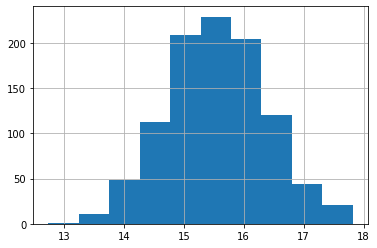

In [122]:
RES = []
for _ in range (1000):
    res = []
    for _ in range(50):
        res.append(random.randint(6, 25))
    RES.append(np.mean(res))
#print(RES)
df = pd.DataFrame({'mean': RES})
df['mean'].hist() 

** Задание 5 **

In [3]:
A = np.array([[1, 4],
             [1, 1]
             ])

In [4]:
B = np.linalg.eig(A)

In [5]:
print(B)

(array([ 3., -1.]), array([[ 0.89442719, -0.89442719],
       [ 0.4472136 ,  0.4472136 ]]))


|(1-λ&4@1&1-λ)|=0 => (1- λ)^2 – 4 =0 => λ^2 - 2 λ – 3 =0
λ1=3 λ2= -1


In [ ]:
λ1=3
|(1-3&4@1&1-3)|  => {(-2x+4y=0@x-2y=0)┤ => x = 2y => (2¦1)

In [ ]:
λ2= -1
|(1+1&4@1&1+1)|  => {(2x+4y=0@x+2y=0)┤ => x = -2y => (2¦(-1))
